In [2]:
import sep
from astropy.io import fits
from astropy.modeling import rotations
import numpy as np
import matplotlib.pyplot as plt
from astropy.utils.data import download_file
from astropy import units as u
%matplotlib inline

In [3]:
f105w = download_file('https://archive.stsci.edu/pub/hlsp/hudf12/hlsp_hudf12_hst_wfc3ir_udfmain_f105w_v1.0_drz.fits')
hdul = fits.open(f105w)
data = hdul[0].data
hdul.info()
hdul.close()

Filename: C:\Users\hitom\AppData\Local\Temp\tmpa5lb8_zp
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     359   (3600, 3600)   float32   


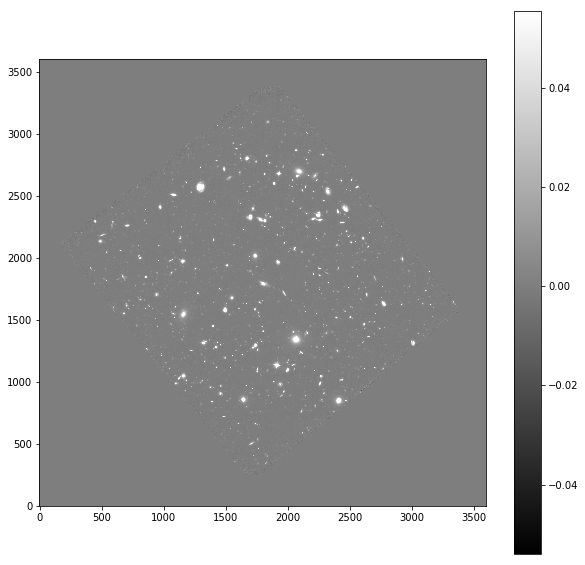

In [4]:
m, s = np.mean(data), np.std(data)
plt.figure(figsize=(10,10))
plt.imshow(data, interpolation='nearest', cmap='gray', vmin=m-s, vmax=m+s, origin='lower')
plt.colorbar();

In [5]:
data = data.byteswap(inplace=True).newbyteorder()
bkg = sep.Background(data, bw=16, bh=16)

In [6]:
print(bkg.globalback)
print(bkg.globalrms)

0.0
0.0005099902045913041


In [7]:
bkg_f105w = bkg.back()

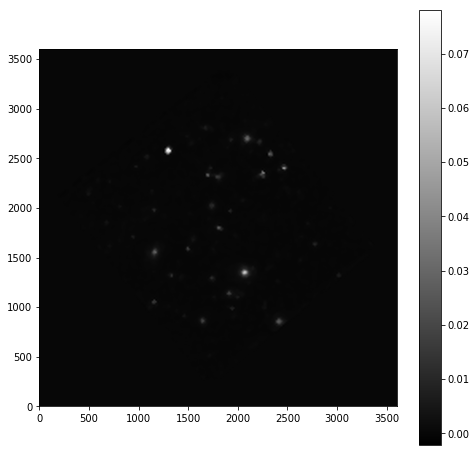

In [8]:
plt.figure(figsize=(8,8))
plt.imshow(bkg_f105w, interpolation='nearest', cmap='gray', origin='lower')
plt.colorbar();

In [9]:
bkg_rms = bkg.rms()

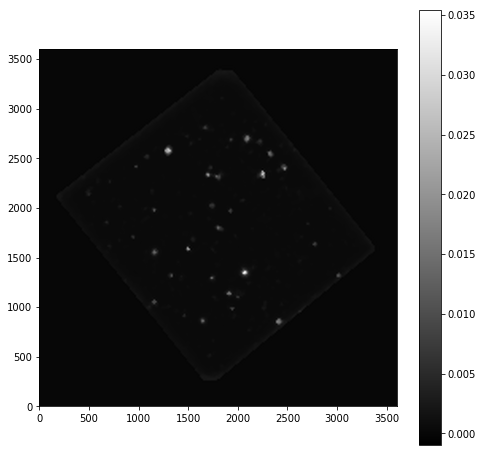

In [10]:
plt.figure(figsize=(8,8))
plt.imshow(bkg_rms, interpolation='nearest', cmap='gray', origin='lower')
plt.colorbar();

In [11]:
data_sub = data - bkg

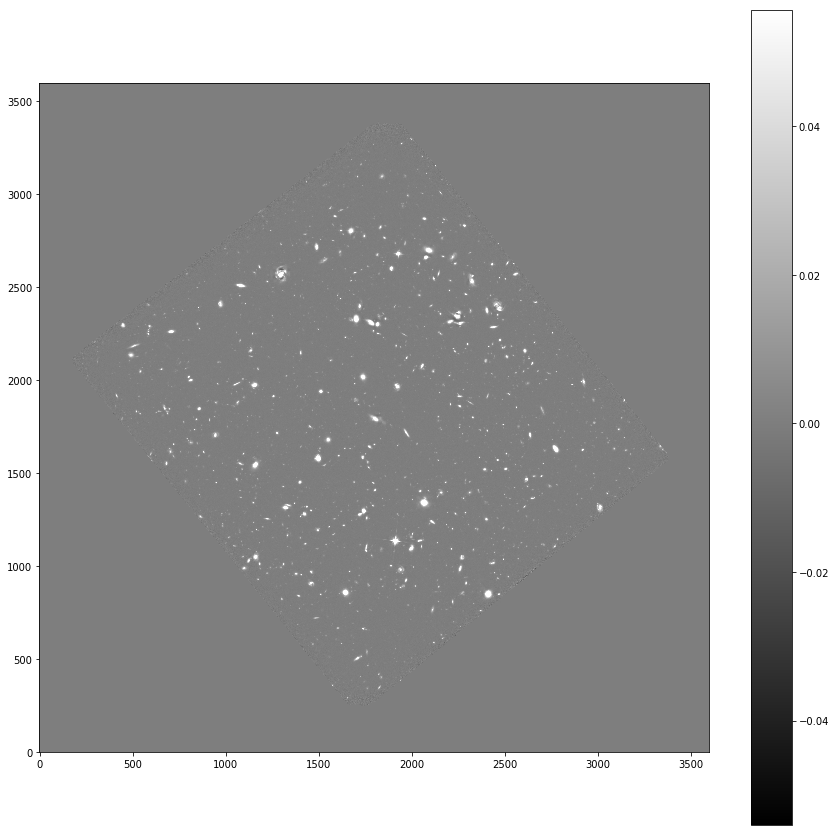

In [12]:
plt.figure(figsize=(15,15))
plt.imshow(data_sub, interpolation='nearest', cmap='gray', vmin=m-s, vmax=m+s, origin='lower')
plt.colorbar()

In [13]:
msk = data<=0.02
objects = sep.extract(data_sub, 3, err=bkg.globalrms, mask=msk)

In [14]:
len(objects)

810

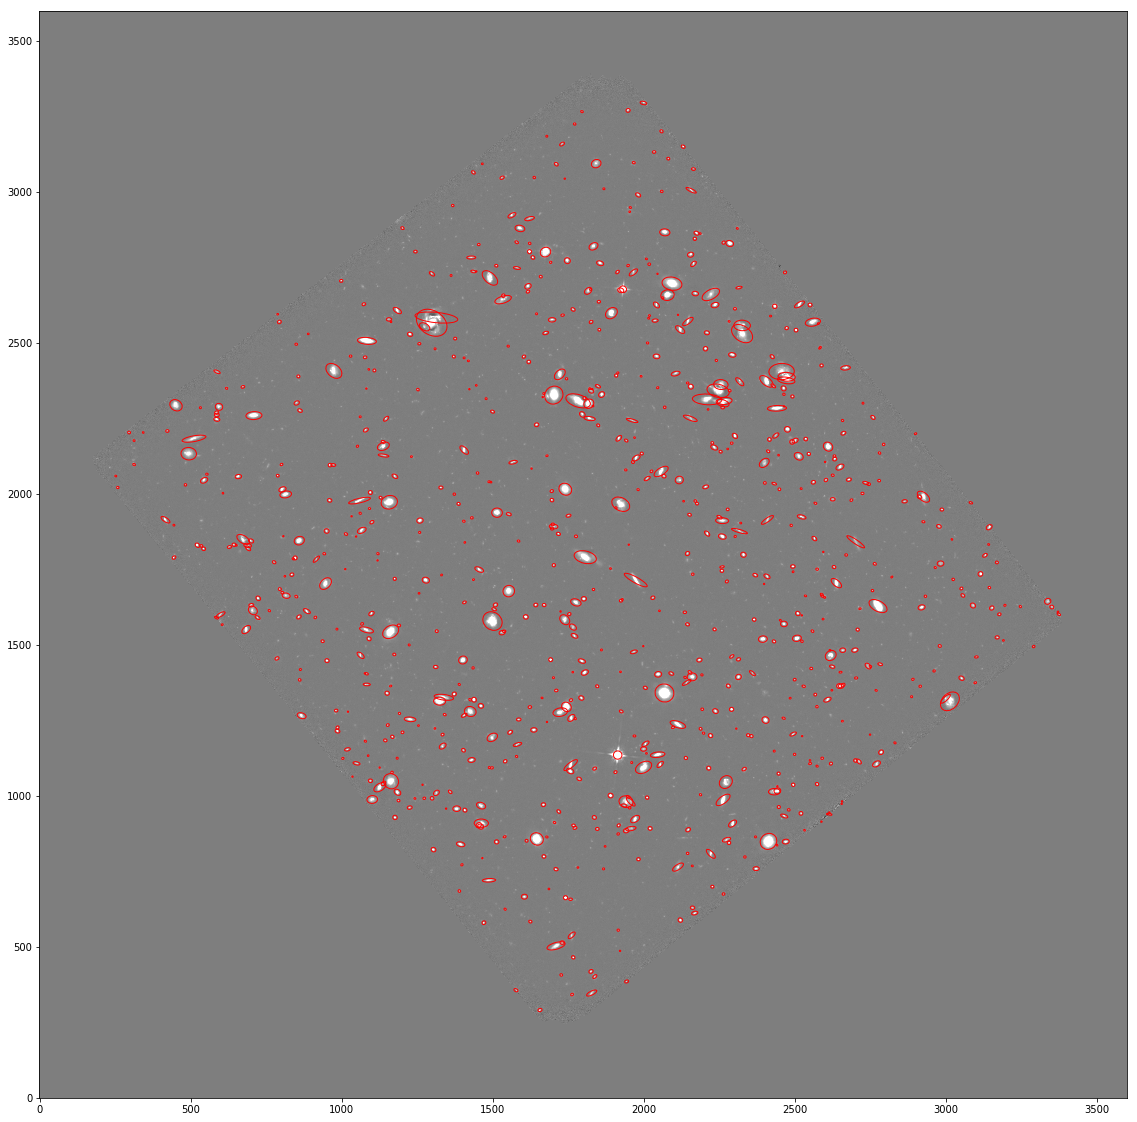

In [15]:
from matplotlib.patches import Ellipse

fig, ax = plt.subplots(figsize=(20,20))
m, s = np.mean(data_sub), np.std(data_sub)
im = ax.imshow(data_sub, interpolation='nearest', cmap='gray', vmin=m-s, vmax=m+s, origin='lower')

for i in range(len(objects)):
    e = Ellipse(xy=(objects['x'][i], objects['y'][i]),width=8*objects['a'][i],height=8*objects['b'][i],angle=objects['theta'][i]*180/(2*np.pi))
    e.set_facecolor('none')
    e.set_edgecolor('red')
    ax.add_artist(e)

In [16]:
flux, fluxerr, flag = sep.sum_circle(data_sub,objects['x'],objects['y'],3.0,err=bkg.globalrms,mask=msk, gain=1.0)

In [17]:
for i in range(10):
    print("object {:d}: flux = {:f} +/- {:f}".format(i,flux[i],fluxerr[i]))

object 0: flux = 1.247050 +/- 1.116717
object 1: flux = 0.686795 +/- 0.828735
object 2: flux = 1.114998 +/- 1.055938
object 3: flux = 1.217056 +/- 1.103206
object 4: flux = 0.899049 +/- 0.948186
object 5: flux = 0.823192 +/- 0.907303
object 6: flux = 0.761383 +/- 0.872577
object 7: flux = 1.263850 +/- 1.124214
object 8: flux = 1.067958 +/- 1.033424
object 9: flux = 0.571732 +/- 0.756134


In [18]:
for i in range(810):
    Mags = {}
    Mags[i] = u.Magnitude(flux[i])
    print(Mags)

{0: <Magnitude 1.24705008 mag>}
{1: <Magnitude 0.68679456 mag>}
{2: <Magnitude 1.11499831 mag>}
{3: <Magnitude 1.21705583 mag>}
{4: <Magnitude 0.89904862 mag>}
{5: <Magnitude 0.82319183 mag>}
{6: <Magnitude 0.76138266 mag>}
{7: <Magnitude 1.26384954 mag>}
{8: <Magnitude 1.0679583 mag>}
{9: <Magnitude 0.57173152 mag>}
{10: <Magnitude 3.18421469 mag>}
{11: <Magnitude 0.83105919 mag>}
{12: <Magnitude 1.0527996 mag>}
{13: <Magnitude 0.67878291 mag>}
{14: <Magnitude 1.43656543 mag>}
{15: <Magnitude 0.85556561 mag>}
{16: <Magnitude 2.2282096 mag>}
{17: <Magnitude 1.21308372 mag>}
{18: <Magnitude 0.6362079 mag>}
{19: <Magnitude 0.80476338 mag>}
{20: <Magnitude 0.640895 mag>}
{21: <Magnitude 8.20261571 mag>}
{22: <Magnitude 1.29652715 mag>}
{23: <Magnitude 0.66673601 mag>}
{24: <Magnitude 0.7499287 mag>}
{25: <Magnitude 0.59049103 mag>}
{26: <Magnitude 0.94978142 mag>}
{27: <Magnitude 1.41938108 mag>}
{28: <Magnitude 0.67708784 mag>}
{29: <Magnitude 1.08661626 mag>}
{30: <Magnitude 0.58598227 

{441: <Magnitude 1.85886554 mag>}
{442: <Magnitude 0.57592425 mag>}
{443: <Magnitude 0.57460695 mag>}
{444: <Magnitude 0.66461086 mag>}
{445: <Magnitude 0.68635723 mag>}
{446: <Magnitude 1.81482284 mag>}
{447: <Magnitude 6.21431339 mag>}
{448: <Magnitude 0.81117031 mag>}
{449: <Magnitude 0.99189884 mag>}
{450: <Magnitude 0.71525998 mag>}
{451: <Magnitude 2.04551306 mag>}
{452: <Magnitude 1.1983465 mag>}
{453: <Magnitude 0.98110986 mag>}
{454: <Magnitude 2.28341219 mag>}
{455: <Magnitude 0.82038316 mag>}
{456: <Magnitude 2.47505064 mag>}
{457: <Magnitude 0.63937256 mag>}
{458: <Magnitude 0.83084507 mag>}
{459: <Magnitude 0.89160133 mag>}
{460: <Magnitude 0.64631342 mag>}
{461: <Magnitude 0.86989619 mag>}
{462: <Magnitude 0.59629488 mag>}
{463: <Magnitude 0.67110287 mag>}
{464: <Magnitude 0.68863187 mag>}
{465: <Magnitude 0.64370277 mag>}
{466: <Magnitude 6.47863654 mag>}
{467: <Magnitude 0.69426506 mag>}
{468: <Magnitude 1.61155464 mag>}
{469: <Magnitude 1.05995734 mag>}
{470: <Magnitud

In [19]:
hdul[0].header

SIMPLE  =                    T / Fits standard                                  
BITPIX  =                  -32 / Bits per pixel                                 
NAXIS   =                    2 / Number of axes                                 
NAXIS1  =                 3600 / Axis length                                    
NAXIS2  =                 3600 / Axis length                                    
EXTEND  =                    F / File may contain extensions                    
IRAF-TLM= '2012-12-04T19:12:18' / Time of last modification                     
FILENAME= 'hlsp_candels_hst_hst_hudf12_wfc3ir_f105w_60mas' / MAST HLSP FileName 
OBJECT  = 'HLSP_HUDF12_HST_WFC3IR_UDFMAIN_F105W_60MAS_V1.0_DRZ[1/1]'            
ORIGIN  = 'KPNO-IRAF'           /                                               
DATE    = '2012-12-04T19:09:11'                                                 
IRAF-MAX=           7.444648E1  /  DATA MAX                                     
IRAF-MIN=         -9.047293E

In [44]:
sdata = data[250:3350:1,200:3400:1]

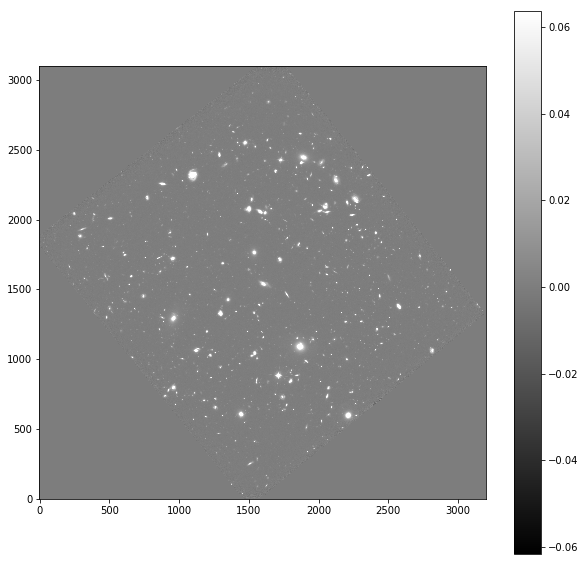

In [80]:
m, s = np.mean(sdata), np.std(sdata)
plt.figure(figsize=(10,10))
plt.imshow(sdata, interpolation='nearest', cmap='gray', vmin=m-s, vmax=m+s, origin='lower')
plt.colorbar();

In [95]:
sdata = sdata.copy(order='C')

def masks(a,b):
    mask_1 = x+y>(1800/1500)*b+a
    sdata[mask_1]
    return sdata

print(sdata.shape)
sbkg = sep.Background(masks(1800,1500), bw=16, bh=16)

(3100, 3200)


NameError: name 'y' is not defined

In [94]:
print(sbkg.globalback)
print(sbkg.globalrms)

0.0
0.0004554259649012238


In [85]:
sbkg_f105w = sbkg.back()

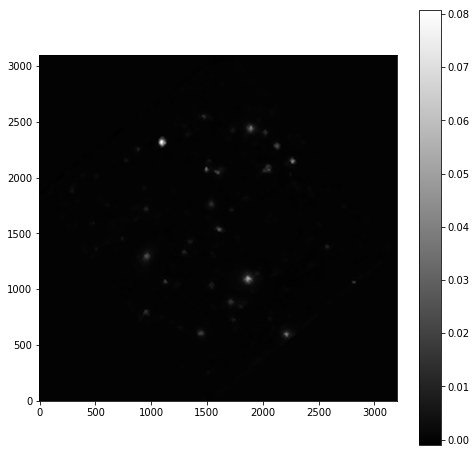

In [86]:
plt.figure(figsize=(8,8))
plt.imshow(sbkg_f105w, interpolation='nearest', cmap='gray', origin='lower')
plt.colorbar();

In [87]:
bkg_rms = bkg.rms()

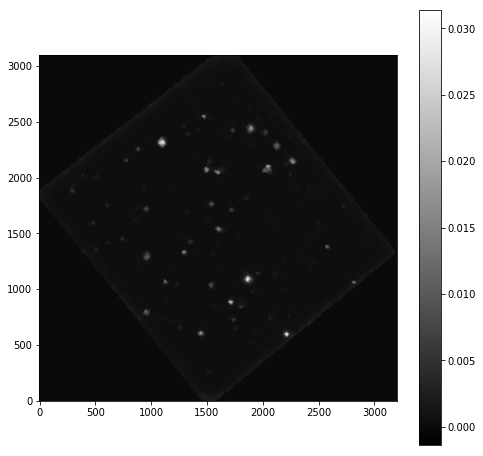

In [88]:
plt.figure(figsize=(8,8))
plt.imshow(bkg_rms, interpolation='nearest', cmap='gray', origin='lower')
plt.colorbar();

In [89]:
sdata_sub = sdata - sbkg

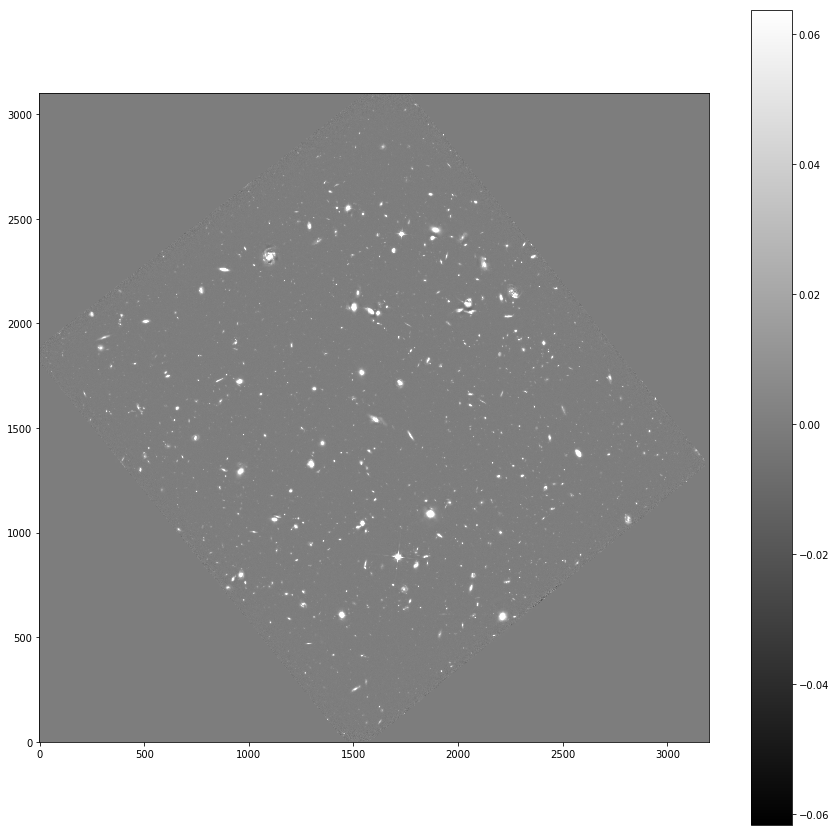

In [90]:
plt.figure(figsize=(15,15))
plt.imshow(sdata_sub, interpolation='nearest', cmap='gray', vmin=m-s, vmax=m+s, origin='lower')
plt.colorbar()